# NLP Assignment 1- Text processing of a book

### Team Members
  1. Himanshu Daga (16ucc037)
  2. Prabhat Sharma (16ucc067)
  3. Ujjwal Madan (16ucs204)

# To Do

    Reference Book: Pride and Prejudice (2nd most popular book on Gutenberg)
    Reference URL: http://www.gutenberg.org/files/1342/1342-0.txt
    Targets:
    1. Import the text
    2. Perform simple text pre-processing steps and tokenize the text
    3. Analyze the frequency distribution of tokens
    4. Create  a Word Cloud including stopwords
    5. Remove the stopwords and then create a word cloud - what's the difference it gives?
    6. Evaluate the relationship between word length and frequency - what's your result?
    7. Do PoS Tagging using some known corpus and get the distribution of various tags


### 1. Import the text book


In [0]:
# Get the text file as a string.
import urllib.request #, urllib.parse, urllib.error
import pandas as pd
import re
import string

url='http://www.gutenberg.org/files/1342/1342-0.txt'
fhand = urllib.request.urlopen(url)

data=''
# read data line by line and decode it to utf8 format
for line in fhand:
    data += line.decode().strip() + ' '


In [0]:
data1=data.split('.')

### 2 Pre-processing & Tokenisation


#### 2.1 Get content of the book from complete text

**There are extra headers and footers by Gutenberg which are not part of actual book and hence they should be removed**

Content of the book starts with- 

"\*\*\* START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE \*\*\*"

Content of the book ends with- 

"\*** END OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE \***"

In [0]:
# finding book's content
start_phrase = "*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"
start_idx = data.find(start_phrase)
end_phrase = "*** END OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***"
end_idx = data.find(end_phrase)
book = data[start_idx + len(start_phrase): end_idx ]


In [5]:
book = book[len("    Produced by Anonymous Volunteers   "):].strip()
book

"PRIDE AND PREJUDICE  By Jane Austen    Chapter 1   It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.  However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.  “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?”  Mr. Bennet replied that he had not.  “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.”  Mr. Bennet made no answer.  “Do you not want to know who has taken it?” cried his wife impatiently.  “_You_ want to tell me, and I have no objection to hearing it.”  This was invitation enough.  “Why, my dear, you must know, Mrs. Long says that Netherfield is taken by a young man of large fortune from the north of England; that h

In [6]:
# Convert the file to all lower case
book = book.lower()
book

"pride and prejudice  by jane austen    chapter 1   it is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.  however little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.  “my dear mr. bennet,” said his lady to him one day, “have you heard that netherfield park is let at last?”  mr. bennet replied that he had not.  “but it is,” returned she; “for mrs. long has just been here, and she told me all about it.”  mr. bennet made no answer.  “do you not want to know who has taken it?” cried his wife impatiently.  “_you_ want to tell me, and i have no objection to hearing it.”  this was invitation enough.  “why, my dear, you must know, mrs. long says that netherfield is taken by a young man of large fortune from the north of england; that h

#### 2.2 Remove all things except alphabets and tokenize

In [7]:
# Remove all things except alphabets and count the words
tokens= re.findall("[a-z]+", book)
counts={}
for w in tokens:
    counts[w]= counts.get(w,0) + 1
d=list(counts.items())
df=pd.DataFrame(d, columns=['words','count'])
print(df.info())
df.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6261 entries, 0 to 6260
Data columns (total 2 columns):
words    6261 non-null object
count    6261 non-null int64
dtypes: int64(1), object(1)
memory usage: 97.9+ KB
None


,words,count
0,pride,49
1,and,3586
2,prejudice,7
3,by,637
4,jane,293
5,austen,2


 Above code splitted words like "Earth's" into 2 words- "Earth" & "s".
 
 To avoid such things, let's do some step-by-step preprocessing where we remove all the numbers and all the punctuations.

 We'll use nltk corpus for this processing.
 

#### 2.3 Remove numbers and punctuations explicitly for tokenisation

In [8]:
book
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [9]:
# remove numbers
text= re.sub(r'\d+', '', book)
# remove punctuations
text=text.translate(text.maketrans("","", string.punctuation))
# total no. of words
tokens_nltk = text.split()
print("No. of tokens earlier: ", len(tokens))
print("No. of tokens now: ", len(tokens_nltk))

No. of tokens earlier:  122830
No. of tokens now:  121483


In [10]:
# let's count all these words
counts={}
for w in tokens_nltk:
    counts[w]= counts.get(w,0) + 1
d = list(counts.items())
df_nltk = pd.DataFrame(d, columns=['words','count'])
print(df_nltk.info())
df_nltk.head(6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7682 entries, 0 to 7681
Data columns (total 2 columns):
words    7682 non-null object
count    7682 non-null int64
dtypes: int64(1), object(1)
memory usage: 120.1+ KB
None


,words,count
0,pride,41
1,and,3435
2,prejudice,6
3,by,628
4,jane,254
5,austen,2


**Observe:**

In our method 2, total number of tokens reduced from 122830 to 121483 but on comparing the info of word-frequency dataframe we find that the number of unique tokens has increased from 6261 to 7682.

This is because earlier, "Earth" and "Earth's" both had a common token "Earth" and an undesired token "s" but now we have 2 different tokens "Earth" and "Earths" out of which none is undesired but the sense of 2nd token has been changed.

### 3. Analyze frequency distribution of tokens


In [0]:
ngram = book.split('.')

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import seaborn as sns

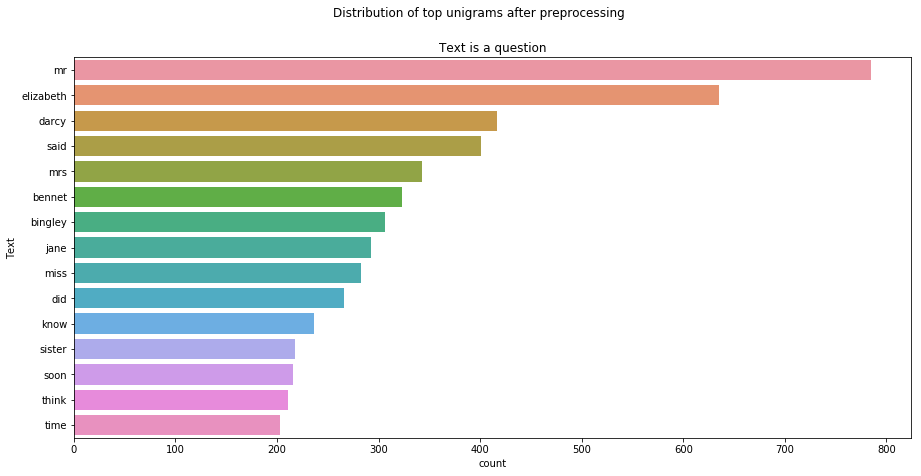

In [49]:
# let's look at frequency distribution of unigrams

def get_top_n_words(text, n=None):
    vec = CountVectorizer(stop_words='english').fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq
common_words = get_top_n_words(ngram, 15)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True);
fig.set_size_inches(15,7)
fig.suptitle('Distribution of top unigrams after preprocessing')
axs.set_title('Text is a question')
sns.barplot(y="Text", x="count",  data=df1[0:15],ax=axs);

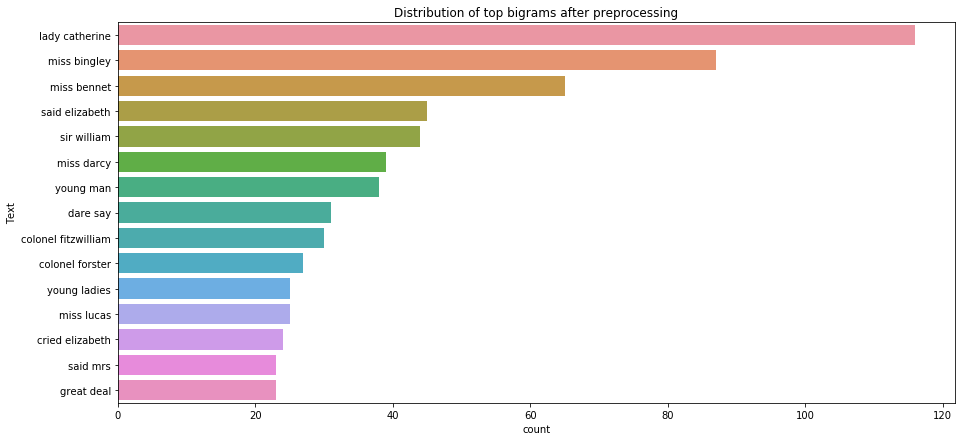

In [50]:
# let's look at frequency distribution of bigrams
def get_top_n_words(text, n=None):
    vec = CountVectorizer(stop_words='english',ngram_range=(2, 2)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq
common_words = get_top_n_words(ngram, 20)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True);
fig.set_size_inches(15,7)
axs.set_title('Distribution of top bigrams after preprocessing')
sns.barplot(y="Text", x="count",  data=df1[0:15],ax=axs);

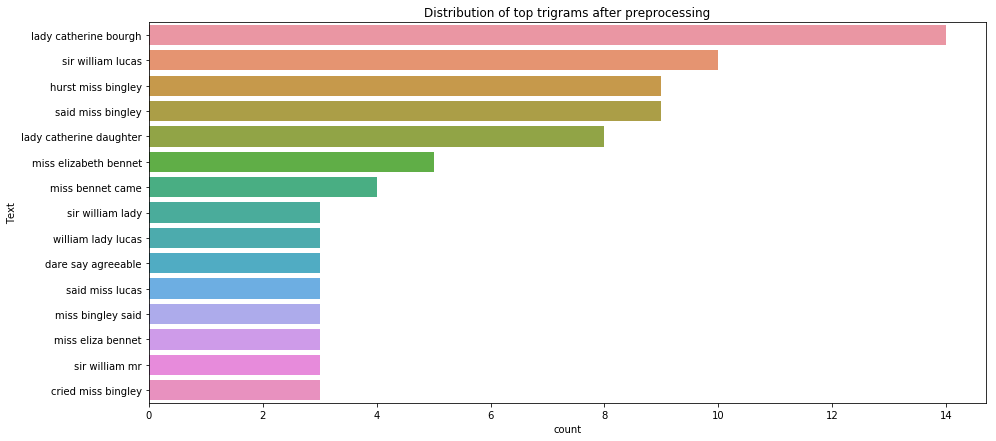

In [53]:
# let's look at frequency distribution of trigrams
def get_top_n_words(text, n=None):
    vec = CountVectorizer(stop_words='english',ngram_range=(3, 3)).fit(text)
    bag_of_words = vec.transform(text)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq
common_words = get_top_n_words(ngram, 15)
df1 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True);
fig.set_size_inches(15,7)
axs.set_title('Distribution of top trigrams after preprocessing')
sns.barplot(y="Text", x="count",  data=df1[0:15],ax=axs);

From the different frequency distributions, we can observe that the average frequency of unigrams >> avg. frequency of bigrams >> avg. frequency of trigrams. Also from the plots we can infer that 'lady catherine', 'miss elizabeth' and 'sir william' are central characters of this text.

### 4. Create  a Word Cloud of T

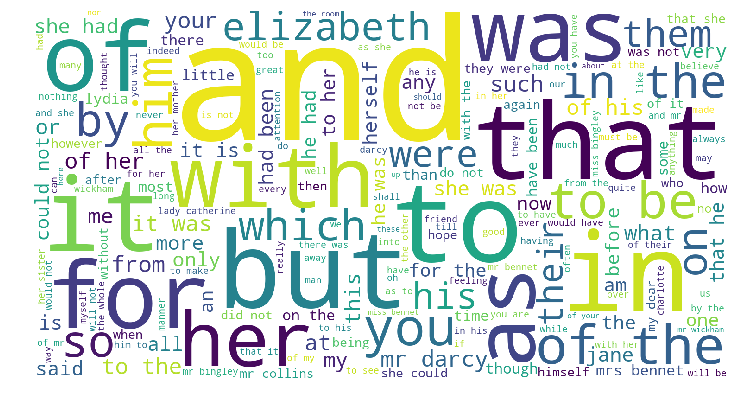

In [12]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 

wordcloud = WordCloud(width = 1500,height = 800,stopwords = {},background_color ='white',min_font_size = 5).generate(text)
# plot the WordCloud image                        
plt.figure(figsize = (10, 25), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off")
plt.tight_layout(pad = 0) 
plt.show() 

### 5. Remove the stopwords and then create a word cloud - what's the difference it gives?

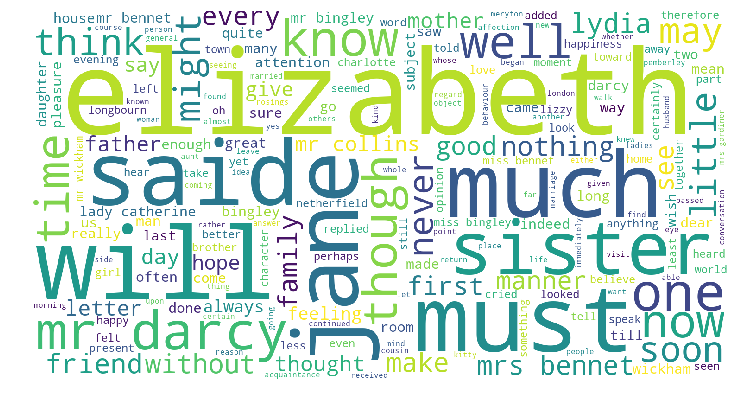

In [13]:
stopwords = set(STOPWORDS) 
wordcloud = WordCloud(width = 1500,height = 800,stopwords = stopwords,background_color ='white',min_font_size = 5).generate(text)

# plot the WordCloud image                        
plt.figure(figsize = (10, 25), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.show() 

**Observation**

Clearly, the word cloud makes much more sense after removing the stop words because without removal of stop words we get -
"and, but, that, the, to" etc. as most frequent words. This word cloud is also correct but it doesn't provide us with much useful information.


### 6. Evaluate world length vs frequency


In [14]:
df_nltk['word_len']=df_nltk.words.str.len()
df_nltk.head()

,words,count,word_len
0,pride,41,5
1,and,3435,3
2,prejudice,6,9
3,by,628,2
4,jane,254,4


In [15]:
df2 = df_nltk[['count','word_len']].groupby(['word_len']).sum()
df2.head(10)

,count
word_len,
1,3687
2,23014
3,27928
4,21829
5,11974
6,9004
7,8402
8,5248
9,4945


### 7. POS tagging and distribution of various tags


In [16]:
data[start_idx:end_idx].strip()

"*** START OF THIS PROJECT GUTENBERG EBOOK PRIDE AND PREJUDICE ***     Produced by Anonymous Volunteers      PRIDE AND PREJUDICE  By Jane Austen    Chapter 1   It is a truth universally acknowledged, that a single man in possession of a good fortune, must be in want of a wife.  However little known the feelings or views of such a man may be on his first entering a neighbourhood, this truth is so well fixed in the minds of the surrounding families, that he is considered the rightful property of some one or other of their daughters.  “My dear Mr. Bennet,” said his lady to him one day, “have you heard that Netherfield Park is let at last?”  Mr. Bennet replied that he had not.  “But it is,” returned she; “for Mrs. Long has just been here, and she told me all about it.”  Mr. Bennet made no answer.  “Do you not want to know who has taken it?” cried his wife impatiently.  “_You_ want to tell me, and I have no objection to hearing it.”  This was invitation enough.  “Why, my dear, you must know

In [0]:
import spacy
nlp = spacy.load("en_core_web_sm")
doc = nlp(book)
counts={}
for token in doc:
    counts[token.pos_]= counts.get(token.pos_,0) + 1
d=list(counts.items())

In [0]:
df_pos = pd.DataFrame(d, columns=['words','count'])
df_pos = df_pos.sort_values('count',ascending=False) 

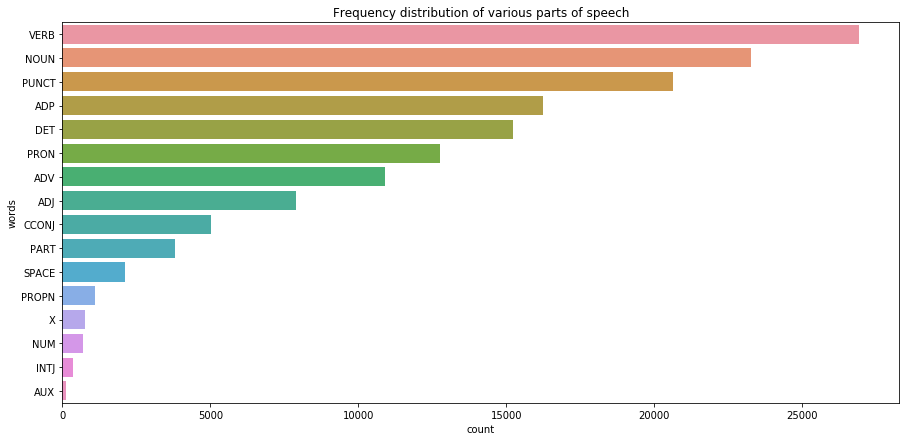

In [58]:
# frequency distribution of various POS
fig, axs = plt.subplots(nrows=1, ncols=1, sharex=True);
fig.set_size_inches(15,7)
axs.set_title('Frequency distribution of various parts of speech')
sns.barplot(y="words", x="count",  data=df_pos[0:16],ax=axs);

Based on the above graph we can see that Nouns and Verbs compose the major parts of speech in general in a text corpus and it aligns with our common knowledge too.